In [1]:
# Importing libraries and dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import csv
import os

In [2]:
# Study data files
disney_raw_data = "disney_movies_total_gross.csv"

# Read data files
disney_df = pd.read_csv(disney_raw_data)
disney_df.head(5)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [3]:
disney_df.columns = ["Movie", "Release Date", "Genre", "Rating", "Total Gross", "Inflated Gross"]
disney_df

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [4]:
# Making a array of genres
genres = disney_df['Genre'].unique()
genres

array(['Musical', 'Adventure', 'Drama', 'Comedy', nan, 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

In [19]:
disney_df['Year']= ""
disney_df['Year'] = disney_df['Release Date'].astype(str).str[0:4]
disney_df['Inflated Gross'] = disney_df['Inflated Gross'].astype('int64')
disney_df['Million Gross'] = disney_df['Inflated Gross']/1000000
disney_df
#df['D'] = df['B'].astype(str).str[0]
#disney_df['Year']= disney_df("Release Date"()[0:4])

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Million Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,5228.953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940,2188.229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,2187.090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946,1078.510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950,920.608730
...,...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2016,12.545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2016,8.874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2016,232.532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2016,246.082029


In [61]:
disney_df.count()

Movie             579
Release Date      579
Genre             562
Rating            523
Total Gross       579
Inflated Gross    579
Year              579
Million Gross     579
dtype: int64

In [67]:
#not working how I think it should!!
disney_df['Rating'] = disney_df['Rating'].fillna(0)
disney_df['Genre'] = disney_df['Genre'].fillna(0)
blank_genre_df = pd.DataFrame(disney_df[disney_df['Genre'] =='0'])

blank_genre_df

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Million Gross


In [59]:
#Not working like I think it should

index = pd.MultiIndex.from_frame(disney_df, names=["Genre", "Rating"])

ValueError: Length of names must match number of levels in MultiIndex.

In [30]:
disney_rating_df=  disney_df[['Rating','Million Gross']].copy 
disney_rating_df

<bound method NDFrame.copy of     Rating  Million Gross
0        G    5228.953251
1        G    2188.229052
2        G    2187.090808
3        G    1078.510579
4        G     920.608730
..     ...            ...
574  PG-13      12.545979
575     PG       8.874389
576  PG-13     232.532923
577     PG     246.082029
578  PG-13     529.483936

[579 rows x 2 columns]>

In [32]:
disney_genre_df=  disney_df[['Genre','Million Gross']].copy 
disney_genre_df

<bound method NDFrame.copy of          Genre  Million Gross
0      Musical    5228.953251
1    Adventure    2188.229052
2      Musical    2187.090808
3    Adventure    1078.510579
4        Drama     920.608730
..         ...            ...
574      Drama      12.545979
575      Drama       8.874389
576  Adventure     232.532923
577  Adventure     246.082029
578  Adventure     529.483936

[579 rows x 2 columns]>

In [37]:
disney_musical_df=  pd.DataFrame(disney_df[disney_df.Genre == "Musical"])
disney_musical_df

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Million Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,5228.953251
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,2187.090808
10,Babes in Toyland,1961-12-14,Musical,G,10218316,124841160,1961,124.841160
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346,1967,789.612346
15,The Aristocats,1970-04-24,Musical,G,55675257,255161499,1970,255.161499
17,Bedknobs and Broomsticks,1971-10-07,Musical,NaN,17871174,91305448,1971,91.305448
114,Beauty and the Beast,1991-11-13,Musical,G,218951625,363017667,1991,363.017667
142,Swing Kids,1993-03-05,Musical,PG-13,5632086,11468231,1993,11.468231
161,The Nightmare Before Christmas,1993-10-13,Musical,PG,50408318,100026637,1993,100.026637
254,Evita,1996-12-25,Musical,PG,50047179,92077628,1996,92.077628


In [51]:
#Replace NaN and Not Rated with current information from the web
disney_musical_df['Rating'] = disney_musical_df['Rating'].replace('Not Rated', 'G')
disney_musical_df['Rating'] = disney_musical_df['Rating'].fillna(0)
disney_musical_df['Rating'] = disney_musical_df['Rating'].replace(0, 'G')
disney_musical_df

,Movie,Release Date,Genre,Rating,Total Gross,Inflated Gross,Year,Million Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,5228.953251
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,2187.090808
10,Babes in Toyland,1961-12-14,Musical,G,10218316,124841160,1961,124.841160
13,The Jungle Book,1967-10-18,Musical,G,141843000,789612346,1967,789.612346
15,The Aristocats,1970-04-24,Musical,G,55675257,255161499,1970,255.161499
17,Bedknobs and Broomsticks,1971-10-07,Musical,G,17871174,91305448,1971,91.305448
114,Beauty and the Beast,1991-11-13,Musical,G,218951625,363017667,1991,363.017667
142,Swing Kids,1993-03-05,Musical,PG-13,5632086,11468231,1993,11.468231
161,The Nightmare Before Christmas,1993-10-13,Musical,PG,50408318,100026637,1993,100.026637
254,Evita,1996-12-25,Musical,PG,50047179,92077628,1996,92.077628


In [52]:
# Group musical genre with average millions inflated gross
disney_musical_rating_df = pd.DataFrame(disney_musical_df.groupby('Rating').mean()['Million Gross'])
#avg_rating_clean['Inflated Gross'] = avg_rating_clean['Inflated Gross'].astype('int64')

#avg_rating_clean = round((avg_rating),1)
disney_musical_rating_df

,Million Gross
Rating,
G,844.760139
PG,88.434005
PG-13,11.468231


Text(0, 0.5, 'Inflated Gross (Millions)')

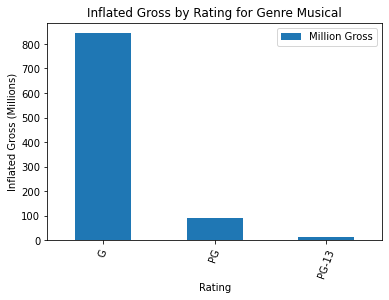

In [54]:
#Bar graph Musical -Genre vs millions Gross
disney_musical_rating_df.plot.bar()
plt.title('Inflated Gross by Rating for Genre Musical')
plt.xlabel('Rating')
plt.xticks(rotation=70)
plt.ylabel('Inflated Gross (Millions)')

In [6]:
disney_count = pd.DataFrame(disney_df.groupby('Genre').count()['Movie'])
disney_count

,Movie
Genre,
Action,40
Adventure,129
Black Comedy,3
Comedy,182
Concert/Performance,2
Documentary,16
Drama,114
Horror,6
Musical,16


In [7]:
# Group genre with average inflated gross
avg_gross_per_genre = pd.DataFrame(disney_df.groupby('Genre').mean()['Inflated Gross'])
avg_gross_per_genre['Inflated Gross'] = avg_gross_per_genre['Inflated Gross'].astype('int64')

            #avg_gross_clean = round((avg_gross_per_genre),1)   
            #avg_gross_clean
avg_gross_per_genre['Million Gross'] = avg_gross_per_genre['Inflated Gross']/1000000
avg_gross_per_genre

,Inflated Gross,Million Gross
Genre,,
Action,137473419,137.473419
Adventure,190397412,190.397412
Black Comedy,52243491,52.243491
Comedy,84667730,84.667730
Concert/Performance,57410839,57.410839
Documentary,12718026,12.718026
Drama,71893021,71.893021
Horror,23413848,23.413848
Musical,603597861,603.597861


Text(0, 0.5, 'Average Inflated Gross (1e8)')

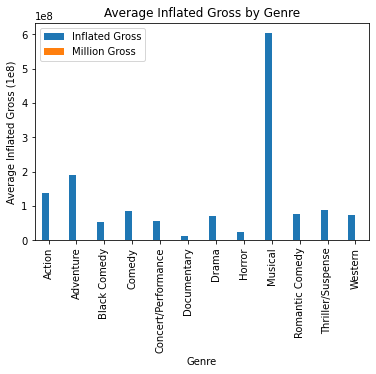

In [8]:
#Bar graph Genre vs Inflated Gross
avg_gross_per_genre.plot.bar()
plt.title('Average Inflated Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Inflated Gross (1e8)')

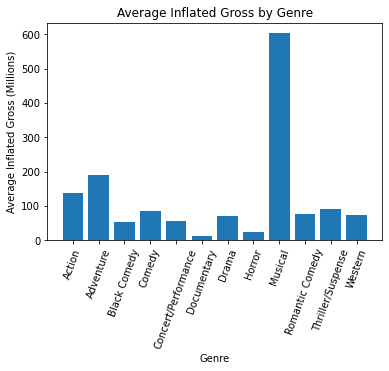

In [9]:
plt.bar(avg_gross_per_genre.index,avg_gross_per_genre['Million Gross'])
#x_axis = np.arange(len(avg_gross_per_genre.index))  For working with the tick marks
#tick_locations = [value +1  for value in x_axis]

plt.xticks(rotation=70)

plt.title("Average Inflated Gross by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Inflated Gross (Millions)")


plt.show()

In [10]:
# Count amount of movies per rating
avg_gross_per_rating = pd.DataFrame(disney_df.groupby('Rating').count()['Movie'])
avg_gross_per_rating.columns = ['Total Movies']
avg_gross_per_rating

,Total Movies
Rating,
G,86
Not Rated,3
PG,187
PG-13,145
R,102


In [17]:
# Group rating with average inflated gross
avg_rating_clean = pd.DataFrame(disney_df.groupby('Rating').mean()['Inflated Gross'])
avg_rating_clean['Inflated Gross'] = avg_rating_clean['Inflated Gross'].astype('int64')

#avg_rating_clean = round((avg_rating),1)
avg_rating_clean

,Inflated Gross
Rating,
G,291260995
Not Rated,299873412
PG,101541433
PG-13,102948584
R,55305805


In [21]:
# Group rating with average inflated gross
avg_rating_clean = pd.DataFrame(disney_df.groupby('Rating').mean()['Million Gross'])
avg_rating_clean['Million Gross'] = avg_rating_clean['Million Gross'].astype('int64')

#avg_rating_clean = round((avg_rating),1)
avg_rating_clean

,Million Gross
Rating,
G,291
Not Rated,299
PG,101
PG-13,102
R,55


Text(0, 0.5, 'Average Inflated Gross (Millions)')

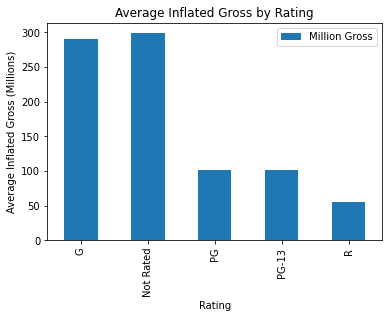

In [23]:
#Bar Graph   Rating vs Inflated Gross
avg_rating_clean.plot.bar()
plt.title('Average Inflated Gross by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Inflated Gross (Millions)')

In [24]:


year_df = pd.DataFrame(disney_df.groupby('Year').mean()['Million Gross'])

#year_df['Inflated Gross'] = year_df['Inflated Gross'].astype('int64')

#year_mean = round((year),1)
year_df

#avg_gross_per_genre = pd.DataFrame(disney_df.groupby('Genre').mean()['Inflated Gross'])
#avg_gross_clean = round((avg_gross_per_genre),1)
#avg_gross_clean

,Million Gross
Year,
1937,5228.953251
1940,2187.659930
1946,1078.510579
1950,920.608730
1954,528.279994
1955,1236.035515
1959,21.505832
1961,599.268906
1962,109.581646


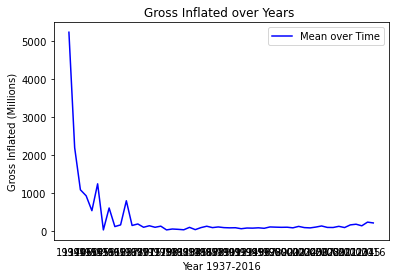

In [26]:
## Maybe we can do this by decade as this is really hard to read###

years = year_df.index
gross_mean = year_df['Million Gross'].values

year_line= plt.plot(years, gross_mean, color="blue",label="Mean over Time")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False)      # ticks along the bottom edge are off
    
plt.title("Gross Inflated over Years ")
plt.xlabel("Year 1937-2016")
#plt.xticks(rotation=70)
plt.ylabel("Gross Inflated (Millions)")
plt.legend()
plt.show()

In [34]:
#trying to make a boxplot but I don't think it will work as the data is soooo far spreadout

#blue_diamond = dict(markerfacecolor='b', marker='D')

#disney_genre_df.boxplot(by='Genre',flierprops=blue_diamond)

#plt.show()